## Fell + Spohrleder (2014) n-gram Baseline Replication

In [1]:
import pandas as pd
english = pd.read_csv("../data/poptrag_lyrics_genres_corpus_filtered_english.csv")

### Preprocessing and n-gram Feature Extraction
1. extract unigram, bigram, and trigram features from the lyrics
- make lowercase, remove punctuation (except apostrophes)
- contractions like "don't" should not be split during tokenization
2. calculate n-gram tf-idf for all n-grams with genres (cat[n]) as documents (frequency +1 per tracks that contiain the n-gram) 
3. rank all n-grams by tf-idf score within each genre
4. "downrank artist specific ngrams" by removing n-grams that occur in less than x? (e.g, 50) different artists
5. per genre and n, select top 100 n-grams as binary features (present / not present in lyrics) (produces 2700 features max for 9 genres; might be less due to overlaps)

In [ ]:
from helpers.n_gram_features import build_ngram_features
build_ngram_features(corpus=english, granularity=5, min_artists=50, top_n=100)

Hello World!


In [ ]:
from helpers.n_gram_features import build_ngram_features
build_ngram_features(corpus=english, granularity=12, min_artists=50, top_n=100)

In [ ]:
from helpers.n_gram_features import build_ngram_features
build_ngram_features(corpus=english, granularity=25, min_artists=50, top_n=100)

In [ ]:
from helpers.n_gram_features import build_ngram_features
build_ngram_features(corpus=english, granularity=32, min_artists=50, top_n=100)

## Train SVM Model 
- what should be implemented for the baseline? 
    1. save components for inspection in report: 
        - model (use logistic regression with elastic net regularization for better interpretability) 
        - model coefficients
        - train data and test data splits (with genre labels, wout features, for distributions comparison)
        - predictions vs true labels on test data for evaluation and conf mat
    2. implement up and downsampling with Nearmiss and BL Smote in an imbalanced Pipeline; train penalty and L1/L2 ratio as well as adaptive sampling (with target ratio)  
    3. implement a Bayesian hyperparameter optimization (with Latin Hypercube) for the model and sampling strategies
    4. implement a full evaluation pipeline with classification report, conf mat, and visualizations in a jupyter notebook report


In [1]:
import pandas as pd

labels_and_artists = pd.read_csv(
    "../../data/poptrag_lyrics_genres_corpus_filtered_english.csv"
)
features5 = pd.read_csv("../../data/FS_G5_lyrics_n_gram_features.csv")

In [16]:
from helpers.split_group_stratified_and_join import (
    split_group_stratified_and_join,
    plot_genre_distribution,
)
from helpers.subsample_training_data import draw_stratified_subsample

granularity = 5
SEED = 42

labels_and_artists.rename(
    columns={"track.s.firstartist.name": "group", f"cat{granularity}": "label"},
    inplace=True,
)
labels_and_artists = labels_and_artists[["group", "label"]]

X_train, X_test, y_train, y_test = split_group_stratified_and_join(
    labels_and_artists, features5, test_size=0.2, random_state=SEED
)

X_train_sub, y_train_sub = draw_stratified_subsample(
    X_train, y_train, frac=0.2, random_state=SEED
)

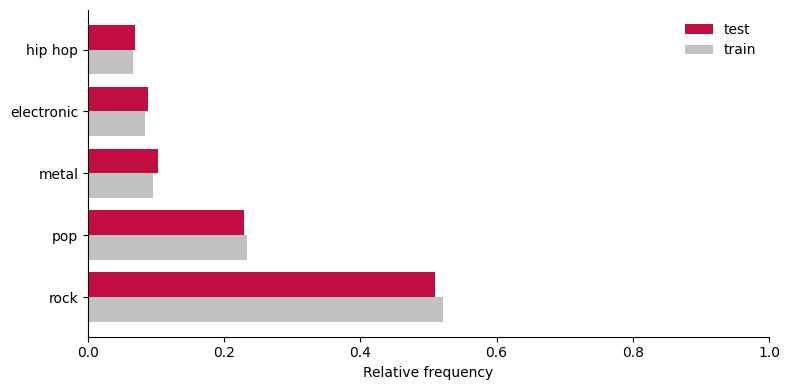

In [23]:
dist = plot_genre_distribution(y_train, y_test)